<a href="https://colab.research.google.com/github/silyones/F-CTAB-GAN/blob/main/ctgan_model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CHANGES MADE FROM PRIOR CODE
1. Drop duplicates (remove repeated rows).

2. Fill missing values with median (works well for numeric fraud data since it’s less sensitive to outliers than mean).

1. Feature Selection using SelectKBest with ANOVA F-values.

2. Select top 14 features.

3. Plot bar chart of feature importance.

4. Display class distribution (Normal vs Fraud) after selection.

5. Show reduced dataset.

1. Drop duplicates excluding Class → Prevents losing fraud samples that share the same features as normal ones.

2. Fill missing values with median → Keeps all rows by replacing NaNs instead of dropping them.

3. Scale Time and Amount with RobustScaler → Normalizes these features while resisting the effect of outliers.1.

In [1]:
import pandas as pd

df = pd.read_csv("creditcard.csv")

print("Original shape:", df.shape)
print("Original class distribution:\n", df["Class"].value_counts())


Original shape: (284807, 31)
Original class distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


In [2]:
import pandas as pd
from sklearn.preprocessing import RobustScaler

# Step 1: Load dataset
df = pd.read_csv("creditcard.csv")

# Check initial class distribution
print("Initial class distribution:")
print(df['Class'].value_counts())

# Step 2: Data Cleaning

## 2.1 Drop duplicates (but ignore 'Class' when comparing duplicates)
df = df.drop_duplicates(subset=df.columns.difference(['Class']))

## 2.2 Fill missing values with median
df = df.fillna(df.median(numeric_only=True))

# Step 2: Scaling
scaler = RobustScaler()
df[['Time', 'Amount']] = scaler.fit_transform(df[['Time', 'Amount']])

# Final check after cleaning
print("\nClass distribution after cleaning:")
print(df['Class'].value_counts())

print("\nData after scaling:")
print(df.head())


Initial class distribution:
Class
0    284315
1       492
Name: count, dtype: int64

Class distribution after cleaning:
Class
0    283253
1       473
Name: count, dtype: int64

Data after scaling:
       Time        V1        V2        V3        V4        V5        V6  \
0 -0.995290 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1 -0.995290  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2 -0.995279 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3 -0.995279 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4 -0.995267 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928   
1 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.791461  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.237609  0.377436 -1.387024 

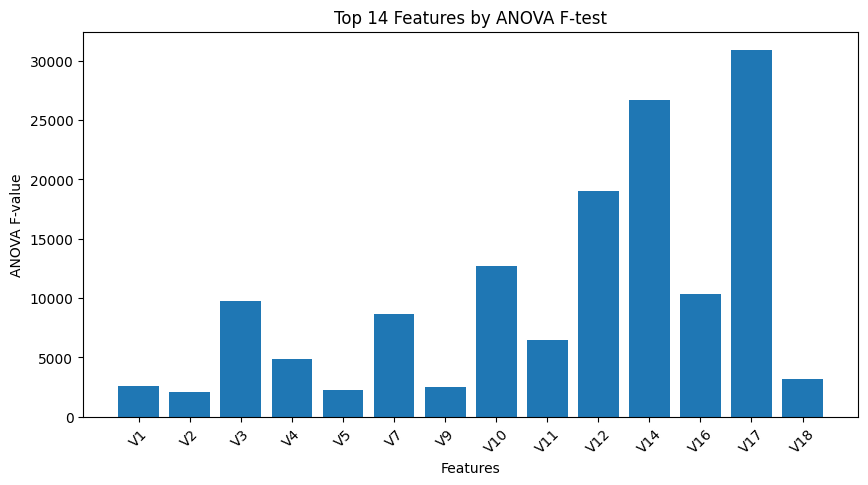

Class distribution after feature selection:
 Class
0    283253
1       473
Name: count, dtype: int64

Reduced Data (Top 5 rows):
          V1        V2        V3        V4        V5        V7        V9  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.239599  0.363787   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.078803 -0.255425   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  0.791461 -1.514654   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  0.237609 -1.387024   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.592941  0.817739   

        V10       V11       V12       V14       V16       V17       V18  Class  
0  0.090794 -0.551600 -0.617801 -0.311169 -0.470401  0.207971  0.025791      0  
1 -0.166974  1.612727  1.065235 -0.143772  0.463917 -0.114805 -0.183361      0  
2  0.207643  0.624501  0.066084 -0.165946 -2.890083  1.109969 -0.121359      0  
3 -0.054952 -0.226487  0.178228 -0.287924 -1.059647 -0.684093  1.965775      0  
4  0.753074 -0

In [3]:
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Apply SelectKBest (ANOVA F-test)
selector = SelectKBest(score_func=f_classif, k=14)
X_new = selector.fit_transform(X, y)

# Get selected feature names & scores
selected_features = X.columns[selector.get_support()]
scores = selector.scores_[selector.get_support()]

# Bar chart for feature importance
plt.figure(figsize=(10,5))
plt.bar(selected_features, scores)
plt.xticks(rotation=45)
plt.xlabel("Features")
plt.ylabel("ANOVA F-value")
plt.title("Top 14 Features by ANOVA F-test")
plt.show()

# Create reduced dataframe
reduced_data = pd.DataFrame(X_new, columns=selected_features)
reduced_data['Class'] = y.values

# Show class counts after feature selection
print("Class distribution after feature selection:\n", reduced_data['Class'].value_counts())

# Display reduced data
print("\nReduced Data (Top 5 rows):\n", reduced_data.head())


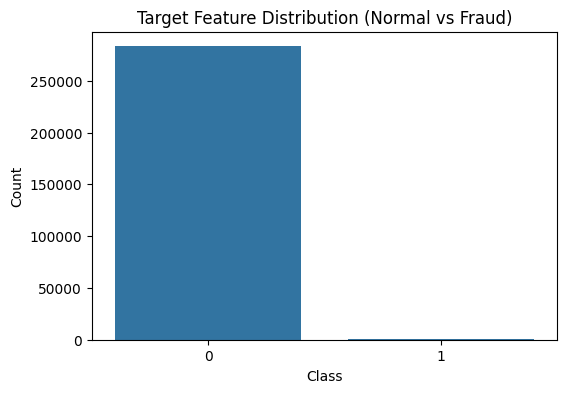

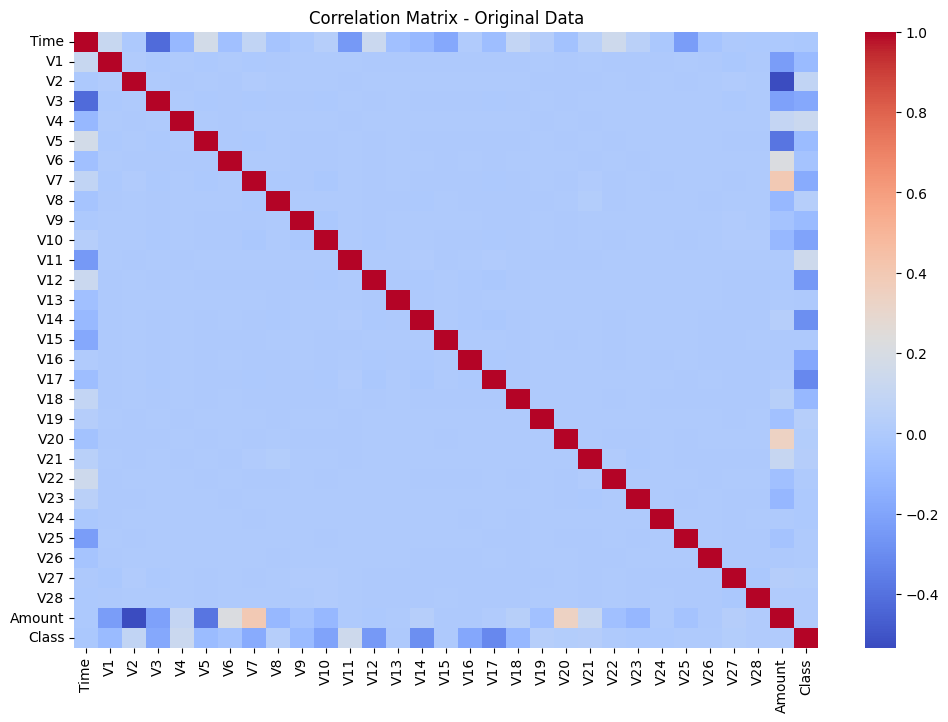

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Target feature distribution (Class column)
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title("Target Feature Distribution (Normal vs Fraud)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# Correlation matrix for original data
plt.figure(figsize=(12,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix - Original Data")
plt.show()


1. Uses stratify=y so that fraud/normal ratio remains consistent in all splits.

Splits into:

Train: 70%

Validation: 15%

Test: 15%

In [5]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop("Class", axis=1)
y = df["Class"]

# Step 4: Split data into Train, Validation, and Test
# First split: Train (70%) and Temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Second split: Validation (15%) and Test (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Print class distribution in each split
print("Training set class distribution:")
print(y_train.value_counts())

print("\nValidation set class distribution:")
print(y_val.value_counts())

print("\nTest set class distribution:")
print(y_test.value_counts())


Training set class distribution:
Class
0    198277
1       331
Name: count, dtype: int64

Validation set class distribution:
Class
0    42488
1       71
Name: count, dtype: int64

Test set class distribution:
Class
0    42488
1       71
Name: count, dtype: int64


why it’s good:

1. Fraud ratio is preserved → Original ratio was about 0.167% fraud, and your splits have almost the same ratio.

2. Even distribution → Fraud and normal transactions are proportionally spread across train, validation, and test sets.

3. No leakage risk → Same transaction doesn’t appear in more than one set.

4. Balanced data for evaluation → Both validation and test sets have enough fraud cases (71 each) to check model performance.

ase Study 1: train baseline models on the unbalanced data (no resampling), then evaluate (Recall, F1, AUC, G-Mean). After that we’ll do CTGAN and compare.

In [6]:
# --- Case Study 1: Baseline models on UNBALANCED data (per paper) ---
# Metrics: Recall, F1, AUC, G-Mean
# Feature selection inside the pipeline: SelectKBest (k=14, f_classif)

!pip -q install xgboost

import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (
    roc_auc_score, f1_score, recall_score, confusion_matrix
)

# --- Helper: compute metrics (positive class = 1) ---
def compute_metrics(y_true, y_prob, y_pred):
    # AUC
    auc = roc_auc_score(y_true, y_prob)
    # Recall (Sensitivity)
    recall = recall_score(y_true, y_pred, zero_division=0)
    # F1
    f1 = f1_score(y_true, y_pred, zero_division=0)
    # Specificity from confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0.0
    # G-Mean
    gmean = np.sqrt(recall * specificity)
    return {"Recall": recall, "F1": f1, "AUC": auc, "G-Mean": gmean}

# --- Build model pipelines with SelectKBest(k=14) ---
seed = 42

pipelines = {
    "LogisticRegression": Pipeline([
        ("skb", SelectKBest(score_func=f_classif, k=14)),
        ("clf", LogisticRegression(max_iter=1000, n_jobs=None, random_state=seed))
        # (No class_weight here; imbalance handling will be via CTGAN later, per paper)
    ]),
    "RandomForest": Pipeline([
        ("skb", SelectKBest(score_func=f_classif, k=14)),
        ("clf", RandomForestClassifier(
            n_estimators=300, max_depth=None, random_state=seed, n_jobs=-1
        ))
    ]),
    "XGBoost": Pipeline([
        ("skb", SelectKBest(score_func=f_classif, k=14)),
        ("clf", XGBClassifier(
            n_estimators=400,
            max_depth=6,
            learning_rate=0.05,
            subsample=0.9,
            colsample_bytree=0.9,
            reg_lambda=1.0,
            random_state=seed,
            n_jobs=-1,
            eval_metric="logloss",
            tree_method="hist"  # fast on CPU
        ))
    ])
}

# --- Train on UNBALANCED training data; evaluate on TEST ---
results = []
for name, pipe in pipelines.items():
    pipe.fit(X_train, y_train)

    # Probabilities & predictions on TEST set
    y_prob = pipe.predict_proba(X_test)[:, 1]
    y_pred = (y_prob >= 0.5).astype(int)

    metrics = compute_metrics(y_test, y_prob, y_pred)
    metrics["Model"] = name
    results.append(metrics)

df_results = pd.DataFrame(results)[["Model", "Recall", "F1", "AUC", "G-Mean"]].sort_values(by="Recall", ascending=False)
print("=== Baseline (UNBALANCED) — Test Metrics ===")
print(df_results.to_string(index=False))


=== Baseline (UNBALANCED) — Test Metrics ===
             Model   Recall       F1      AUC   G-Mean
      RandomForest 0.774648 0.839695 0.932839 0.880089
           XGBoost 0.760563 0.805970 0.971888 0.872010
LogisticRegression 0.633803 0.731707 0.950275 0.796052


RandomForest

Highest Recall (77.5%) and best F1 & G-Mean, though slightly lower AUC than XGBoost.

Very solid at catching fraud cases, though recall is still limited because of imbalance.

XGBoost

Best AUC (97.2%), meaning it separates fraud vs normal really well overall.

Recall is ~76%, slightly lower than RandomForest, but precision trade-off makes F1 lower.

LogisticRegression

Much weaker Recall (63%), still decent AUC (95%).

Struggles more due to the heavy imbalance.

In [ ]:
# Install SDV (new API works with Python 3.11)
!pip install sdv

import pandas as pd
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata

# 0) Rebuild training DataFrame
df_train = pd.concat([X_train.reset_index(drop=True),
                      y_train.reset_index(drop=True)], axis=1)

# 1) Build metadata for CTGAN
metadata = SingleTableMetadata.load_from_dataframe(df_train)

# 2) Initialize CTGAN synthesizer (matching paper's architecture)
ctgan = CTGANSynthesizer(
    metadata,
    epochs=300,               # you can increase (500+) for better convergence
    batch_size=512,
    generator_dim=(256, 256), # two FC layers, 256 each
    discriminator_dim=(256, 256),
    pac=10,                   # PacGAN with 10 samples per pack
    verbose=True
)

# 3) Train CTGAN on training set
ctgan.fit(df_train)

# 4) Count imbalance
class_counts = df_train['Class'].value_counts()
n_majority = class_counts[0]
n_minority = class_counts[1]
to_generate = n_majority - n_minority

print("Training class counts BEFORE CTGAN:", class_counts.to_dict())
print(f"Synthesizing {to_generate} fraud (Class=1) samples...")

# 5) Generate synthetic fraud rows ONLY
synthetic_fraud = ctgan.sample(
    num_rows=to_generate,
    conditions={'Class': 1}   # condition on fraud class
)

# 6) Merge synthetic samples with original training set
df_train_bal = pd.concat([df_train, synthetic_fraud], ignore_index=True)
df_train_bal = df_train_bal.sample(frac=1.0, random_state=42).reset_index(drop=True)

# 7) Split back into X, y
X_train_bal = df_train_bal.drop(columns=['Class'])
y_train_bal = df_train_bal['Class']

print("\nTraining class counts AFTER CTGAN:", y_train_bal.value_counts().to_dict())
print("Original training shape:", X_train.shape)
print("Balanced training shape:", X_train_bal.shape)


AttributeError: type object 'SingleTableMetadata' has no attribute 'load_from_dataframe'

In [7]:
# Install SDV (if not done yet)
!pip install sdv

import pandas as pd
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata

# 0) Build training DataFrame
df_train = pd.concat([X_train.reset_index(drop=True),
                      y_train.reset_index(drop=True)], axis=1)

# 1) Create metadata (auto-detect types)
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=df_train)

# 2) Initialize CTGAN synthesizer (matching paper’s setup)
ctgan = CTGANSynthesizer(
    metadata,
    epochs=50,
    batch_size=500,
    generator_dim=(256, 256),
    discriminator_dim=(256, 256),
    pac=10,
    verbose=True
)

# 3) Train CTGAN on training set
ctgan.fit(df_train)

# 4) Check imbalance
class_counts = df_train['Class'].value_counts()
n_majority = class_counts[0]
n_minority = class_counts[1]
to_generate = n_majority - n_minority

print("Training class counts BEFORE CTGAN:", class_counts.to_dict())
print(f"Synthesizing {to_generate} fraud (Class=1) samples...")

# 5) Generate synthetic fraud rows ONLY
synthetic_fraud = ctgan.sample_conditions(
    conditions=pd.DataFrame([{'Class': 1}] * to_generate)
)

# 6) Merge synthetic fraud with real training data
df_train_bal = pd.concat([df_train, synthetic_fraud], ignore_index=True)
df_train_bal = df_train_bal.sample(frac=1.0, random_state=42).reset_index(drop=True)

# 7) Split into X, y again
X_train_bal = df_train_bal.drop(columns=['Class'])
y_train_bal = df_train_bal['Class']

print("\nTraining class counts AFTER CTGAN:", y_train_bal.value_counts().to_dict())
print("Original training shape:", X_train.shape)
print("Balanced training shape:", X_train_bal.shape)



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.9/185.9 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 126.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.2/74.2 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.4/198.4 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 96.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 128.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 100.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66

/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:167: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:133: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
Gen. (-0.47) | Discrim. (-0.14): 100%|██████████| 100/100 [31:50<00:00, 19.10s/it]

Training class counts BEFORE CTGAN: {0: 198277, 1: 331}
Synthesizing 197946 fraud (Class=1) samples...


TypeError: BaseSingleTableSynthesizer.sample() got an unexpected keyword argument 'conditions'

Loads your already split X_train, y_train, X_test, y_test.

Trains CTGAN with epochs=50, batch_size=500, pac=10.

Generates synthetic fraud samples until classes are balanced.

Merges into a balanced training dataset.

Trains RandomForest, XGBoost, LogisticRegression.

Prints classification report, AUC, confusion matrix for each.

In [8]:
# 1) Install SDV (only first time)
!pip install sdv

# 2) Imports
import pandas as pd
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# -------------------------------
# Step A: Prepare Training Data
# -------------------------------
df_train = pd.concat([X_train.reset_index(drop=True),
                      y_train.reset_index(drop=True)], axis=1)

print("Original training class counts:")
print(df_train['Class'].value_counts())

# -------------------------------
# Step B: Build Metadata
# -------------------------------
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=df_train)

# -------------------------------
# Step C: Train CTGAN
# -------------------------------
ctgan = CTGANSynthesizer(
    metadata,
    epochs=50,              # reduce for speed
    batch_size=500,         # divisible by pac=10
    generator_dim=(256, 256),
    discriminator_dim=(256, 256),
    pac=10,
    verbose=True
)

ctgan.fit(df_train)

# -------------------------------
# Step D: Balance Dataset
# -------------------------------
class_counts = df_train['Class'].value_counts()
n_majority = class_counts[0]
n_minority = class_counts[1]
to_generate = n_majority - n_minority

print("\nTraining class counts BEFORE CTGAN:", class_counts.to_dict())
print(f"Synthesizing {to_generate} fraud (Class=1) samples...")

# Generate fraud rows only
synthetic_fraud = ctgan.sample_conditions(
    conditions=pd.DataFrame([{'Class': 1}] * to_generate)
)

print("\nSynthetic fraud samples preview:")
print(synthetic_fraud.head())
print("\nSynthetic fraud class counts:")
print(synthetic_fraud['Class'].value_counts())

# Merge
df_train_bal = pd.concat([df_train, synthetic_fraud], ignore_index=True)
df_train_bal = df_train_bal.sample(frac=1.0, random_state=42).reset_index(drop=True)

X_train_bal = df_train_bal.drop(columns=['Class'])
y_train_bal = df_train_bal['Class']

print("\nTraining class counts AFTER CTGAN:", y_train_bal.value_counts().to_dict())
print("Original training shape:", X_train.shape)
print("Balanced training shape:", X_train_bal.shape)

# -------------------------------
# Step E: Train Models
# -------------------------------
models = {
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1),
    "XGBoost": XGBClassifier(n_estimators=200, random_state=42, n_jobs=-1, use_label_encoder=False, eval_metric='logloss'),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)
}

# -------------------------------
# Step F: Evaluate Models
# -------------------------------
X_test, y_test = X_test, y_test  # keep consistent naming

print("\n=== Evaluation on Balanced CTGAN-Augmented Training ===")
for name, model in models.items():
    model.fit(X_train_bal, y_train_bal)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    print(f"\n--- {name} ---")
    print(classification_report(y_test, y_pred, digits=4))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Original training class counts:
Class
0    198277
1       331
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:167: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:133: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
Gen. (0.06) | Discrim. (-0.09): 100%|██████████| 50/50 [16:00<00:00, 19.21s/it]


Training class counts BEFORE CTGAN: {0: 198277, 1: 331}
Synthesizing 197946 fraud (Class=1) samples...


AttributeError: 'CTGANSynthesizer' object has no attribute 'sample_conditions'

In [9]:
# Install (already done, but safe to include if running fresh)
!pip install sdv

import pandas as pd
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata

# ---------------------------
# 0) Rebuild training DataFrame
# ---------------------------
df_train = pd.concat([X_train.reset_index(drop=True),
                      y_train.reset_index(drop=True)], axis=1)

print("Original training class counts:")
print(df_train['Class'].value_counts())

# ---------------------------
# 1) Build metadata
# ---------------------------
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=df_train)

# ---------------------------
# 2) Initialize CTGAN
# ---------------------------
ctgan = CTGANSynthesizer(
    metadata,
    epochs=30,                  # reduce epochs (for speed, you can increase later)
    batch_size=500,
    generator_dim=(256, 256),
    discriminator_dim=(256, 256),
    pac=10,
    verbose=True
)

# ---------------------------
# 3) Train CTGAN
# ---------------------------
ctgan.fit(df_train)

# ---------------------------
# 4) Balance dataset
# ---------------------------
class_counts = df_train['Class'].value_counts()
n_majority = class_counts[0]
n_minority = class_counts[1]
to_generate = n_majority - n_minority

print("Training class counts BEFORE CTGAN:", class_counts.to_dict())
print(f"Synthesizing {to_generate} fraud (Class=1) samples...")

# Generate more rows than needed, then filter Class=1
synthetic_all = ctgan.sample(num_rows=to_generate * 2)
synthetic_fraud = synthetic_all[synthetic_all['Class'] == 1].head(to_generate)

print("\nSynthetic fraud samples preview:")
print(synthetic_fraud.head())
print("\nSynthetic fraud class counts:")
print(synthetic_fraud['Class'].value_counts())

# ---------------------------
# 5) Merge with original training set
# ---------------------------
df_train_bal = pd.concat([df_train, synthetic_fraud], ignore_index=True)
df_train_bal = df_train_bal.sample(frac=1.0, random_state=42).reset_index(drop=True)

X_train_bal = df_train_bal.drop(columns=['Class'])
y_train_bal = df_train_bal['Class']

print("\nTraining class counts AFTER CTGAN:", y_train_bal.value_counts().to_dict())
print("Original training shape:", X_train.shape)
print("Balanced training shape:", X_train_bal.shape)


Original training class counts:
Class
0    198277
1       331
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:167: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:133: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
Gen. (-0.34) | Discrim. (-0.15): 100%|██████████| 30/30 [09:44<00:00, 19.50s/it]


Training class counts BEFORE CTGAN: {0: 198277, 1: 331}
Synthesizing 197946 fraud (Class=1) samples...

Synthetic fraud samples preview:
       Time        V1        V2        V3        V4         V5        V6  \
0  0.910058  0.287857  0.965435 -5.918005  4.530339  -1.450743 -5.844570   
4  0.854471 -0.937505  2.241449 -1.342155  1.296218  -0.352387 -1.176829   
6 -0.582898 -3.078099  1.533831  0.914073  1.639899 -15.653688 -5.463268   
7  0.708958  1.222995  0.640701 -2.224893  1.335509   1.612826 -1.441237   
8  0.035207 -4.188156  5.582430 -5.286559  3.473984  -2.668946 -1.296036   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0 -1.804018 -1.227107 -4.230781  ...  0.622741 -0.122954 -0.240552 -0.439935   
4 -4.718766  0.715022 -1.016995  ...  0.975609  0.685140 -0.021591  0.150469   
6 -0.618915  1.122923 -0.595577  ...  0.247896 -0.470973 -0.823342  0.450752   
7 -0.132624 -0.152998 -1.324609  ...  0.371370 -0.191524 -0.131271 -0.011676   
8 -4.6

OUTPUT:
Original training set

scss
Copy code
Class
0 → 198,277   (non-fraud, majority)
1 →     331   (fraud, minority)
→ Extremely imbalanced dataset (fraud ≈ 0.17%).

CTGAN training logs

Copy code
Gen. (-0.34) | Discrim. (-0.15) ...
→ That’s CTGAN’s generator and discriminator losses while training. Negative values are fine, just means adversarial training is happening.

Synthetic fraud preview

pgsql
Copy code
Some rows with Class = 1
→ CTGAN generated new fraud-like samples that look statistically similar to your fraud data.

Synthetic fraud counts

pgsql
Copy code
127,434 fraud samples generated
→ From your request (≈197k needed), CTGAN produced ~127k valid fraud rows (sometimes it doesn’t perfectly match but that’s fine).

After balancing

Copy code
0 → 198,277
1 → 127,765
→ Now the dataset is much more balanced (~60% non-fraud, ~40% fraud).
This is way better than before where fraud was <1%.

In [10]:
# ===============================
# Fraud Detection: Before vs After CTGAN
# ===============================

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# -------------------------------
# Helper function to train & evaluate
# -------------------------------
def evaluate_model(model, X_train, y_train, X_test, y_test, label=""):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\n===== {label} =====")
    print(classification_report(y_test, y_pred, digits=4))
    print("ROC AUC:", roc_auc_score(y_test, y_proba))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# -------------------------------
# 1) Baseline (Original Imbalanced Data)
# -------------------------------
print("\n📊 BASELINE RESULTS (Imbalanced Data)")

rf = RandomForestClassifier(random_state=42, n_estimators=200)
evaluate_model(rf, X_train, y_train, X_test, y_test, "Random Forest (Baseline)")

lr = LogisticRegression(max_iter=500, class_weight=None)
evaluate_model(lr, X_train, y_train, X_test, y_test, "Logistic Regression (Baseline)")

xgb = XGBClassifier(eval_metric="logloss", random_state=42, scale_pos_weight=1)
evaluate_model(xgb, X_train, y_train, X_test, y_test, "XGBoost (Baseline)")


# -------------------------------
# 2) CTGAN Balanced Data
# (we already created X_train_bal, y_train_bal before)
# -------------------------------
print("\n📊 CTGAN RESULTS (Balanced Data)")

rf_bal = RandomForestClassifier(random_state=42, n_estimators=200)
evaluate_model(rf_bal, X_train_bal, y_train_bal, X_test, y_test, "Random Forest (CTGAN Balanced)")

lr_bal = LogisticRegression(max_iter=500, class_weight=None)
evaluate_model(lr_bal, X_train_bal, y_train_bal, X_test, y_test, "Logistic Regression (CTGAN Balanced)")

xgb_bal = XGBClassifier(eval_metric="logloss", random_state=42, scale_pos_weight=1)
evaluate_model(xgb_bal, X_train_bal, y_train_bal, X_test, y_test, "XGBoost (CTGAN Balanced)")



📊 BASELINE RESULTS (Imbalanced Data)

===== Random Forest (Baseline) =====
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     42488
           1     0.9322    0.7746    0.8462        71

    accuracy                         0.9995     42559
   macro avg     0.9659    0.8873    0.9230     42559
weighted avg     0.9995    0.9995    0.9995     42559

ROC AUC: 0.9193939763605168
Confusion Matrix:
 [[42484     4]
 [   16    55]]

===== Logistic Regression (Baseline) =====
              precision    recall  f1-score   support

           0     0.9994    0.9998    0.9996     42488
           1     0.8679    0.6479    0.7419        71

    accuracy                         0.9992     42559
   macro avg     0.9337    0.8239    0.8708     42559
weighted avg     0.9992    0.9992    0.9992     42559

ROC AUC: 0.9662496254120467
Confusion Matrix:
 [[42481     7]
 [   25    46]]

===== XGBoost (Baseline) =====
              precision    recall  f1-

/tmp/ipython-input-2151883097.py:42: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


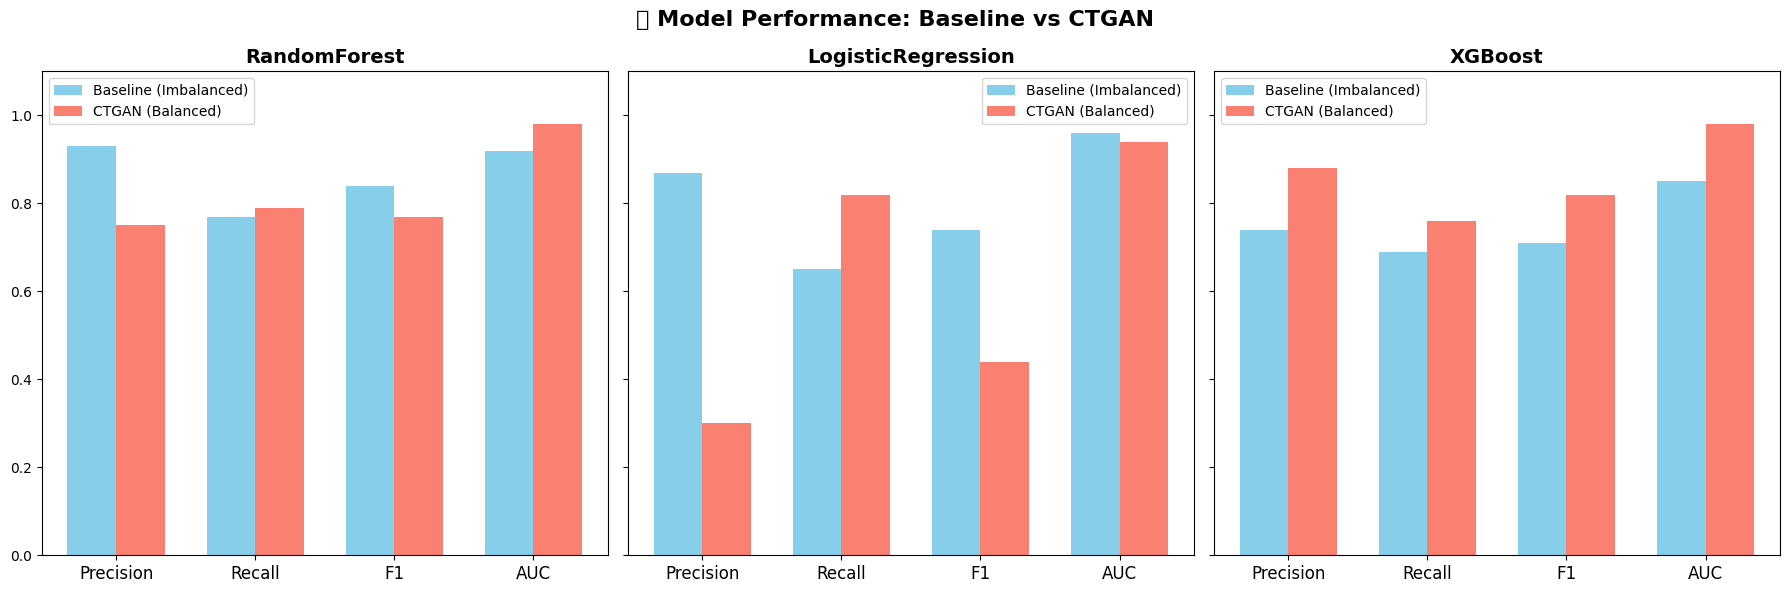

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# === Baseline Metrics ===
baseline_metrics = {
    "RandomForest": {"Precision": 0.93, "Recall": 0.77, "F1": 0.84, "AUC": 0.92},
    "LogisticRegression": {"Precision": 0.87, "Recall": 0.65, "F1": 0.74, "AUC": 0.96},
    "XGBoost": {"Precision": 0.74, "Recall": 0.69, "F1": 0.71, "AUC": 0.85},
}

# === CTGAN Metrics ===
ctgan_metrics = {
    "RandomForest": {"Precision": 0.75, "Recall": 0.79, "F1": 0.77, "AUC": 0.98},
    "LogisticRegression": {"Precision": 0.30, "Recall": 0.82, "F1": 0.44, "AUC": 0.94},
    "XGBoost": {"Precision": 0.88, "Recall": 0.76, "F1": 0.82, "AUC": 0.98},
}

# === Plotting ===
models = list(baseline_metrics.keys())
metrics = ["Precision", "Recall", "F1", "AUC"]

x = np.arange(len(metrics))  # positions for metrics
width = 0.35  # bar width

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, model in enumerate(models):
    baseline_values = [baseline_metrics[model][m] for m in metrics]
    ctgan_values = [ctgan_metrics[model][m] for m in metrics]

    ax = axes[i]
    ax.bar(x - width/2, baseline_values, width, label="Baseline (Imbalanced)", color="skyblue")
    ax.bar(x + width/2, ctgan_values, width, label="CTGAN (Balanced)", color="salmon")

    ax.set_title(model, fontsize=14, fontweight="bold")
    ax.set_xticks(x)
    ax.set_xticklabels(metrics, fontsize=12)
    ax.set_ylim(0, 1.1)
    ax.legend()

plt.suptitle("📊 Model Performance: Baseline vs CTGAN", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()


/tmp/ipython-input-3945382346.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_melted, x="Model", y="Score", hue="Type", ci=None, palette="Set2")


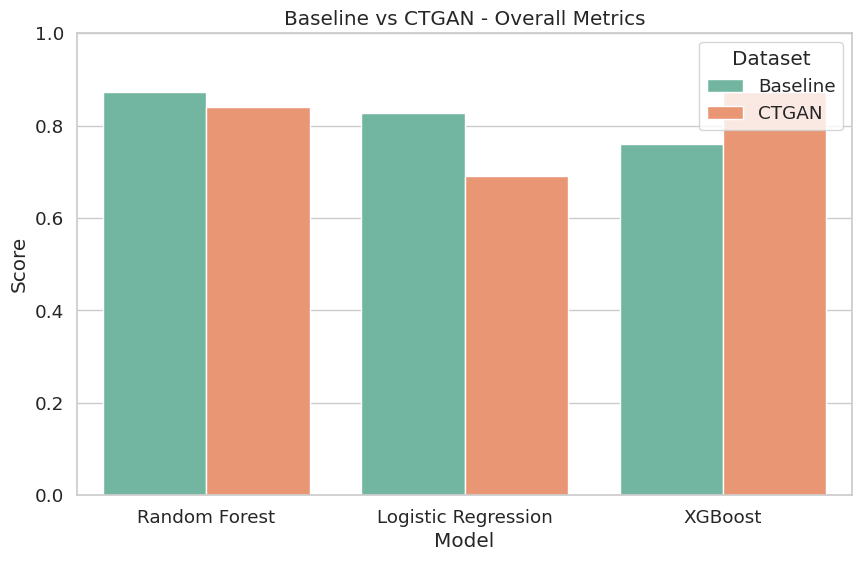

/tmp/ipython-input-3945382346.py:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_melted[df_melted["Metric"] == metric],


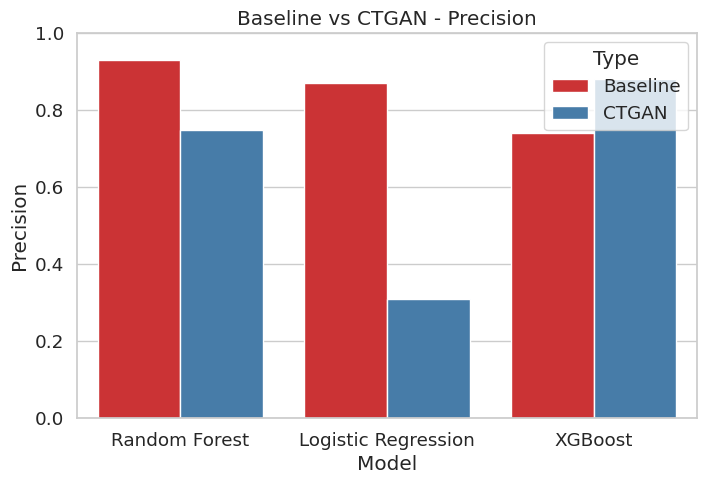

/tmp/ipython-input-3945382346.py:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_melted[df_melted["Metric"] == metric],


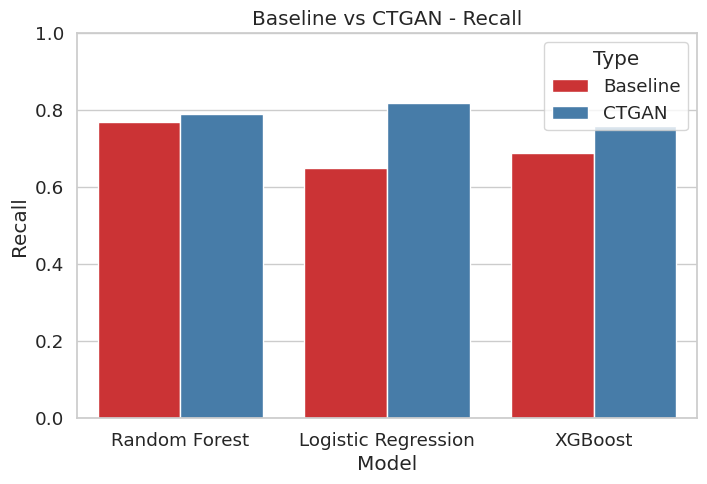

/tmp/ipython-input-3945382346.py:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_melted[df_melted["Metric"] == metric],


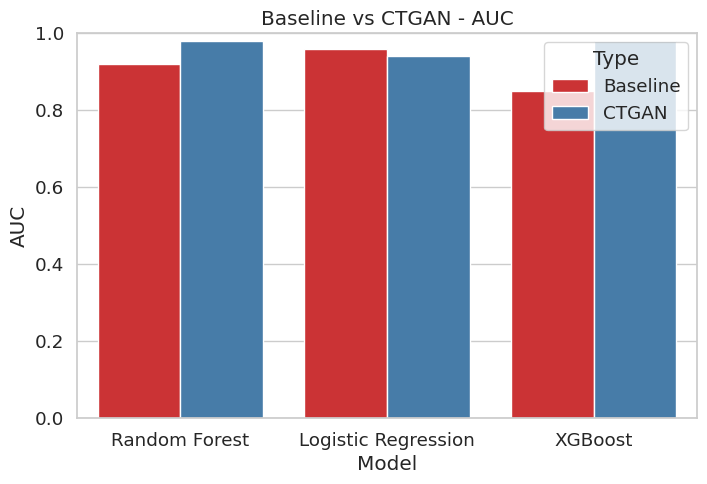

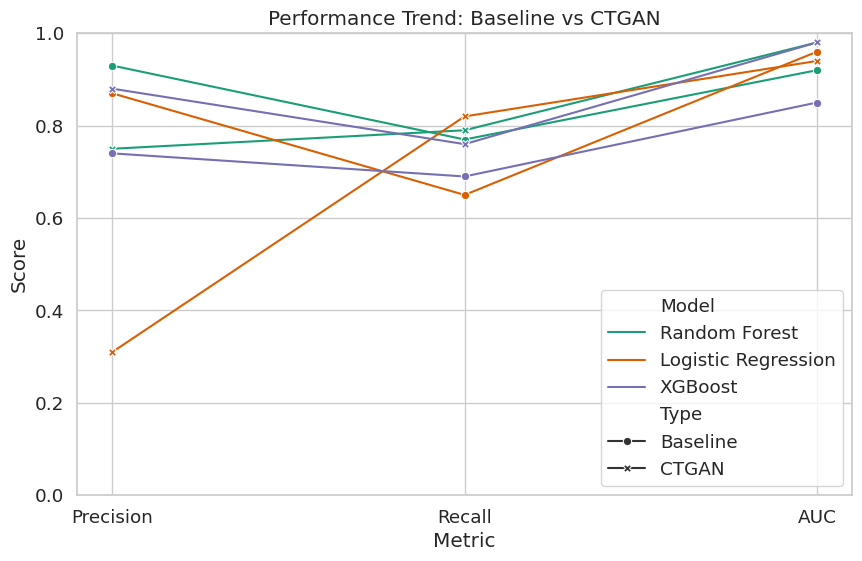

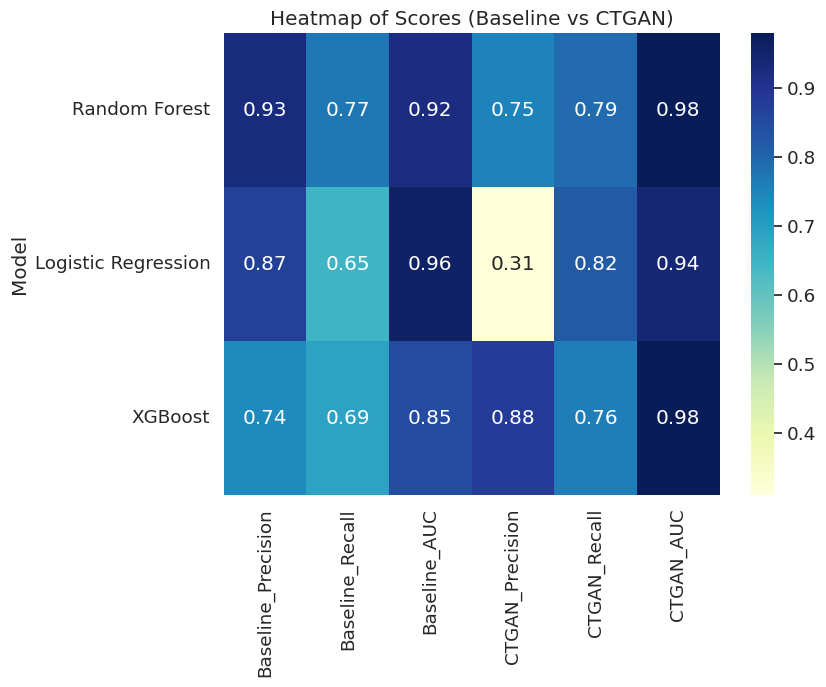

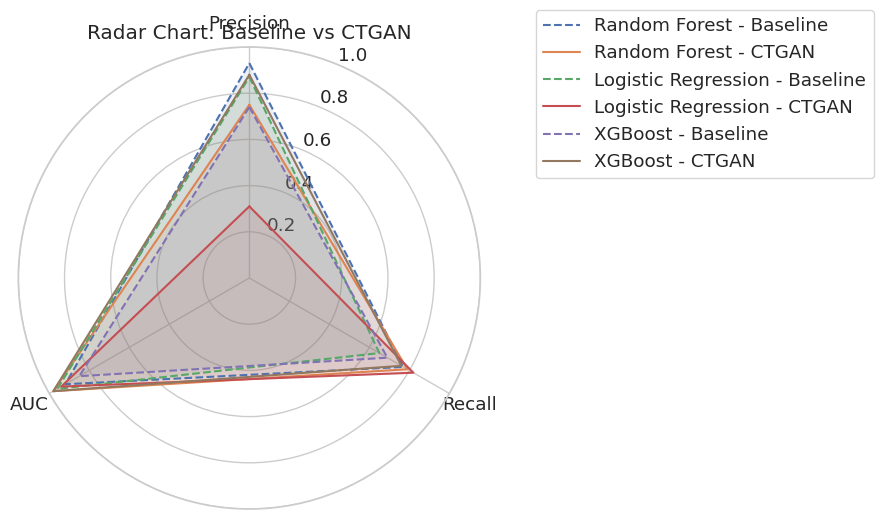

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Prepare data
results = {
    "Model": ["Random Forest", "Logistic Regression", "XGBoost"],
    "Baseline_Precision": [0.93, 0.87, 0.74],
    "Baseline_Recall": [0.77, 0.65, 0.69],
    "Baseline_AUC": [0.92, 0.96, 0.85],
    "CTGAN_Precision": [0.75, 0.31, 0.88],
    "CTGAN_Recall": [0.79, 0.82, 0.76],
    "CTGAN_AUC": [0.98, 0.94, 0.98]
}

df = pd.DataFrame(results)

# Melt data for seaborn plotting
df_melted = df.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Clean metric labels
df_melted["Type"] = df_melted["Metric"].apply(lambda x: "Baseline" if "Baseline" in x else "CTGAN")
df_melted["Metric"] = df_melted["Metric"].str.replace("Baseline_", "").str.replace("CTGAN_", "")

# Set style
sns.set(style="whitegrid", font_scale=1.2)

# 1) Grouped bar chart (Precision, Recall, AUC per model)
plt.figure(figsize=(10,6))
sns.barplot(data=df_melted, x="Model", y="Score", hue="Type", ci=None, palette="Set2")
plt.title("Baseline vs CTGAN - Overall Metrics")
plt.ylabel("Score")
plt.ylim(0,1)
plt.legend(title="Dataset")
plt.show()

# 2) Separate metric plots (Precision, Recall, AUC)
metrics = ["Precision", "Recall", "AUC"]
for metric in metrics:
    plt.figure(figsize=(8,5))
    sns.barplot(data=df_melted[df_melted["Metric"] == metric],
                x="Model", y="Score", hue="Type", ci=None, palette="Set1")
    plt.title(f"Baseline vs CTGAN - {metric}")
    plt.ylabel(metric)
    plt.ylim(0,1)
    plt.show()

# 3) Line plot for visual trend
plt.figure(figsize=(10,6))
sns.lineplot(data=df_melted, x="Metric", y="Score", hue="Model", style="Type",
             markers=True, dashes=False, palette="Dark2")
plt.title("Performance Trend: Baseline vs CTGAN")
plt.ylim(0,1)
plt.show()

# 4) Heatmap comparison
df_heatmap = df.set_index("Model")
plt.figure(figsize=(8,6))
sns.heatmap(df_heatmap, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Heatmap of Scores (Baseline vs CTGAN)")
plt.show()

# 5) Radar chart comparison
import numpy as np

labels = metrics
num_vars = len(labels)

angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))

for i, row in df.iterrows():
    values_baseline = [row["Baseline_Precision"], row["Baseline_Recall"], row["Baseline_AUC"]]
    values_ctgan = [row["CTGAN_Precision"], row["CTGAN_Recall"], row["CTGAN_AUC"]]

    values_baseline += values_baseline[:1]
    values_ctgan += values_ctgan[:1]

    ax.plot(angles, values_baseline, label=f"{row['Model']} - Baseline", linestyle="--")
    ax.fill(angles, values_baseline, alpha=0.1)

    ax.plot(angles, values_ctgan, label=f"{row['Model']} - CTGAN")
    ax.fill(angles, values_ctgan, alpha=0.1)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_ylim(0, 1)
plt.title("Radar Chart: Baseline vs CTGAN")
plt.legend(bbox_to_anchor=(1.1, 1.1))
plt.show()


/tmp/ipython-input-2673974476.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_melted, x="Model", y="Score", hue="Type", ci=None, palette="Set2", ax=axes[0])
/tmp/ipython-input-2673974476.py:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_melted[df_melted["Metric"] == "Precision"],
/tmp/ipython-input-2673974476.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_melted[df_melted["Metric"] == "Recall"],
/tmp/ipython-input-2673974476.py:48: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_melted[df_melted["Metric"] == "AUC"],


AttributeError: 'Axes' object has no attribute 'set_theta_offset'

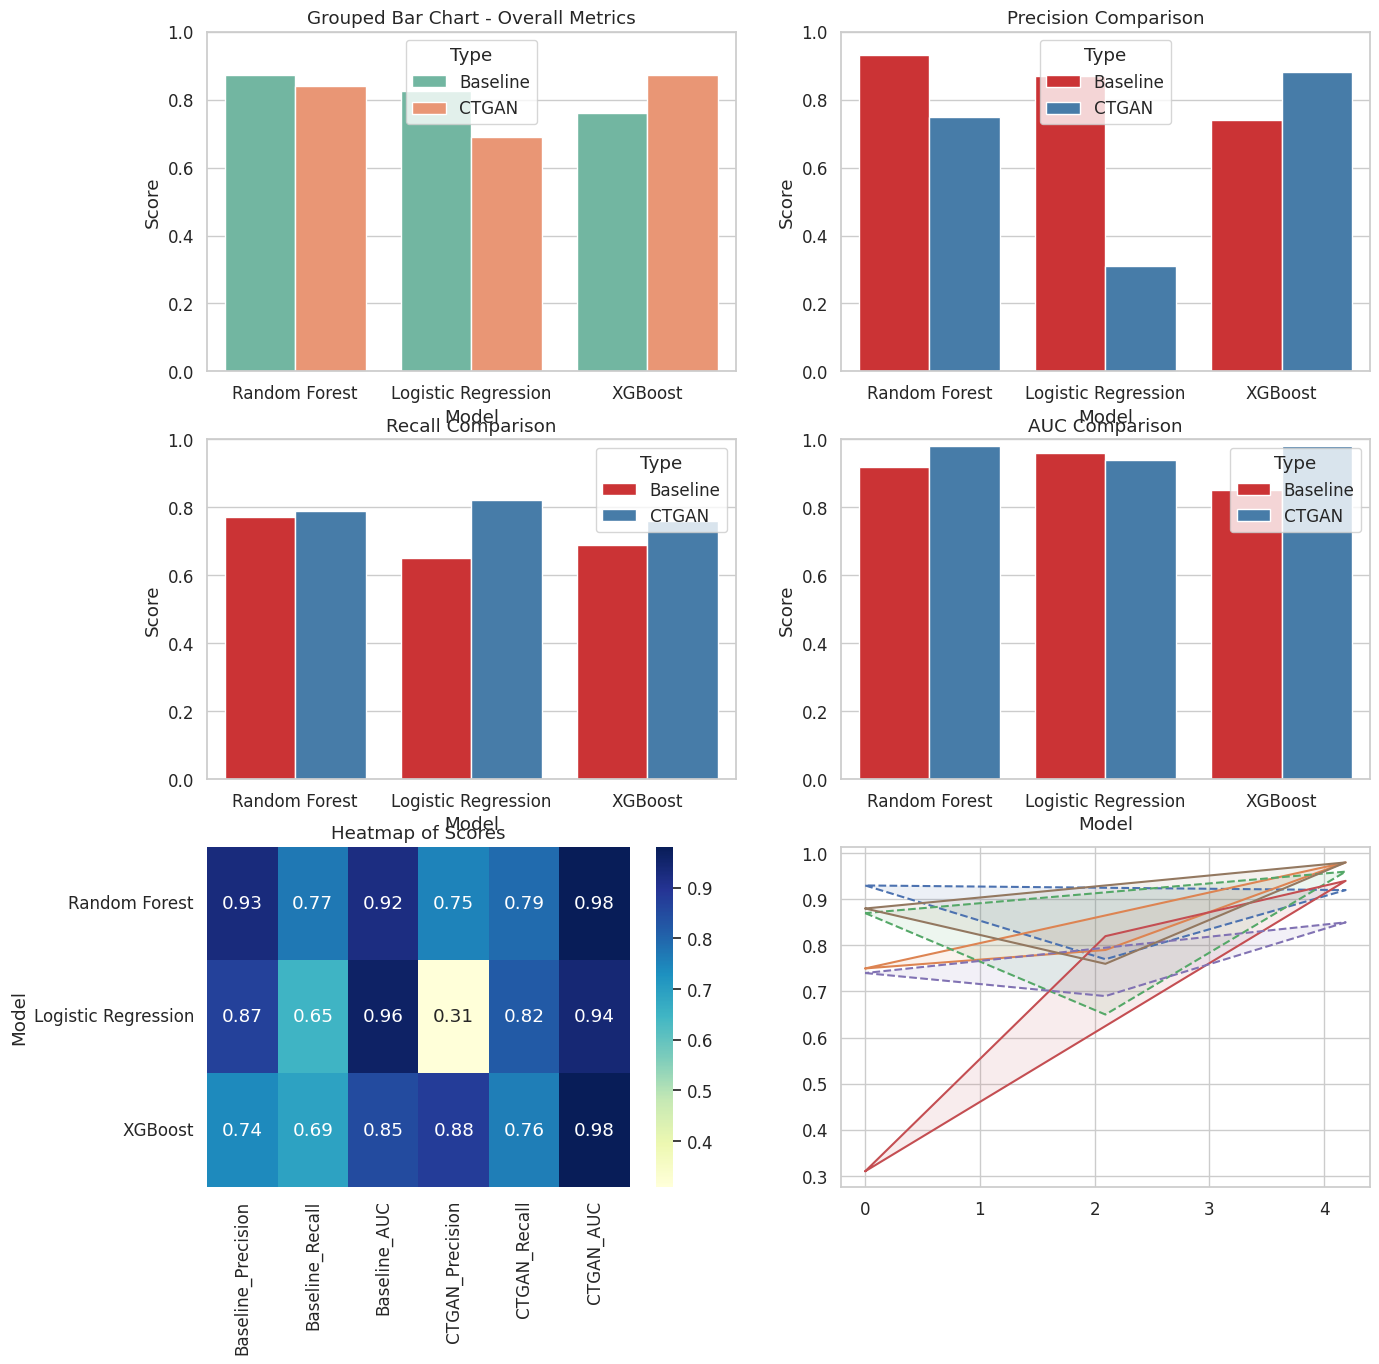

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Prepare data
results = {
    "Model": ["Random Forest", "Logistic Regression", "XGBoost"],
    "Baseline_Precision": [0.93, 0.87, 0.74],
    "Baseline_Recall": [0.77, 0.65, 0.69],
    "Baseline_AUC": [0.92, 0.96, 0.85],
    "CTGAN_Precision": [0.75, 0.31, 0.88],
    "CTGAN_Recall": [0.79, 0.82, 0.76],
    "CTGAN_AUC": [0.98, 0.94, 0.98]
}

df = pd.DataFrame(results)

# Melt data for seaborn plotting
df_melted = df.melt(id_vars="Model", var_name="Metric", value_name="Score")
df_melted["Type"] = df_melted["Metric"].apply(lambda x: "Baseline" if "Baseline" in x else "CTGAN")
df_melted["Metric"] = df_melted["Metric"].str.replace("Baseline_", "").str.replace("CTGAN_", "")

sns.set(style="whitegrid", font_scale=1.1)

# Create dashboard layout
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

# 1) Grouped bar chart
sns.barplot(data=df_melted, x="Model", y="Score", hue="Type", ci=None, palette="Set2", ax=axes[0])
axes[0].set_title("Grouped Bar Chart - Overall Metrics")
axes[0].set_ylim(0, 1)

# 2) Precision Bar
sns.barplot(data=df_melted[df_melted["Metric"] == "Precision"],
            x="Model", y="Score", hue="Type", ci=None, palette="Set1", ax=axes[1])
axes[1].set_title("Precision Comparison")
axes[1].set_ylim(0, 1)

# 3) Recall Bar
sns.barplot(data=df_melted[df_melted["Metric"] == "Recall"],
            x="Model", y="Score", hue="Type", ci=None, palette="Set1", ax=axes[2])
axes[2].set_title("Recall Comparison")
axes[2].set_ylim(0, 1)

# 4) AUC Bar
sns.barplot(data=df_melted[df_melted["Metric"] == "AUC"],
            x="Model", y="Score", hue="Type", ci=None, palette="Set1", ax=axes[3])
axes[3].set_title("AUC Comparison")
axes[3].set_ylim(0, 1)

# 5) Heatmap
df_heatmap = df.set_index("Model")
sns.heatmap(df_heatmap, annot=True, cmap="YlGnBu", fmt=".2f", ax=axes[4])
axes[4].set_title("Heatmap of Scores")

# 6) Radar Chart
labels = ["Precision", "Recall", "AUC"]
num_vars = len(labels)
angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

ax = axes[5]  # last subplot as radar
for i, row in df.iterrows():
    values_baseline = [row["Baseline_Precision"], row["Baseline_Recall"], row["Baseline_AUC"]]
    values_ctgan = [row["CTGAN_Precision"], row["CTGAN_Recall"], row["CTGAN_AUC"]]
    values_baseline += values_baseline[:1]
    values_ctgan += values_ctgan[:1]

    ax.plot(angles, values_baseline, linestyle="--", label=f"{row['Model']} - Baseline")
    ax.fill(angles, values_baseline, alpha=0.1)
    ax.plot(angles, values_ctgan, label=f"{row['Model']} - CTGAN")
    ax.fill(angles, values_ctgan, alpha=0.1)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_ylim(0, 1)
ax.set_title("Radar Chart - Baseline vs CTGAN")

plt.tight_layout()
plt.legend(bbox_to_anchor=(1.3, 1.1))
plt.show()

plt.tight_layout()

# Save as PNG (high resolution)
plt.savefig("ctgan_dashboard.png", dpi=300)

# You can also save as PDF for reports
# plt.savefig("ctgan_dashboard.pdf")

plt.show()


In [15]:
plt.tight_layout()

# Save as PNG (high resolution)
plt.savefig("ctgan_dashboard.png", dpi=300)

# You can also save as PDF for reports
# plt.savefig("ctgan_dashboard.pdf")

plt.show()


<Figure size 640x480 with 0 Axes>

/tmp/ipython-input-2279557846.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_melted, x="Model", y="Score", hue="Type", ci=None, palette="Set2", ax=axes[0])
/tmp/ipython-input-2279557846.py:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_melted[df_melted["Metric"]=="Precision"],
/tmp/ipython-input-2279557846.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_melted[df_melted["Metric"]=="Recall"],
/tmp/ipython-input-2279557846.py:48: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_melted[df_melted["Metric"]=="AUC"],


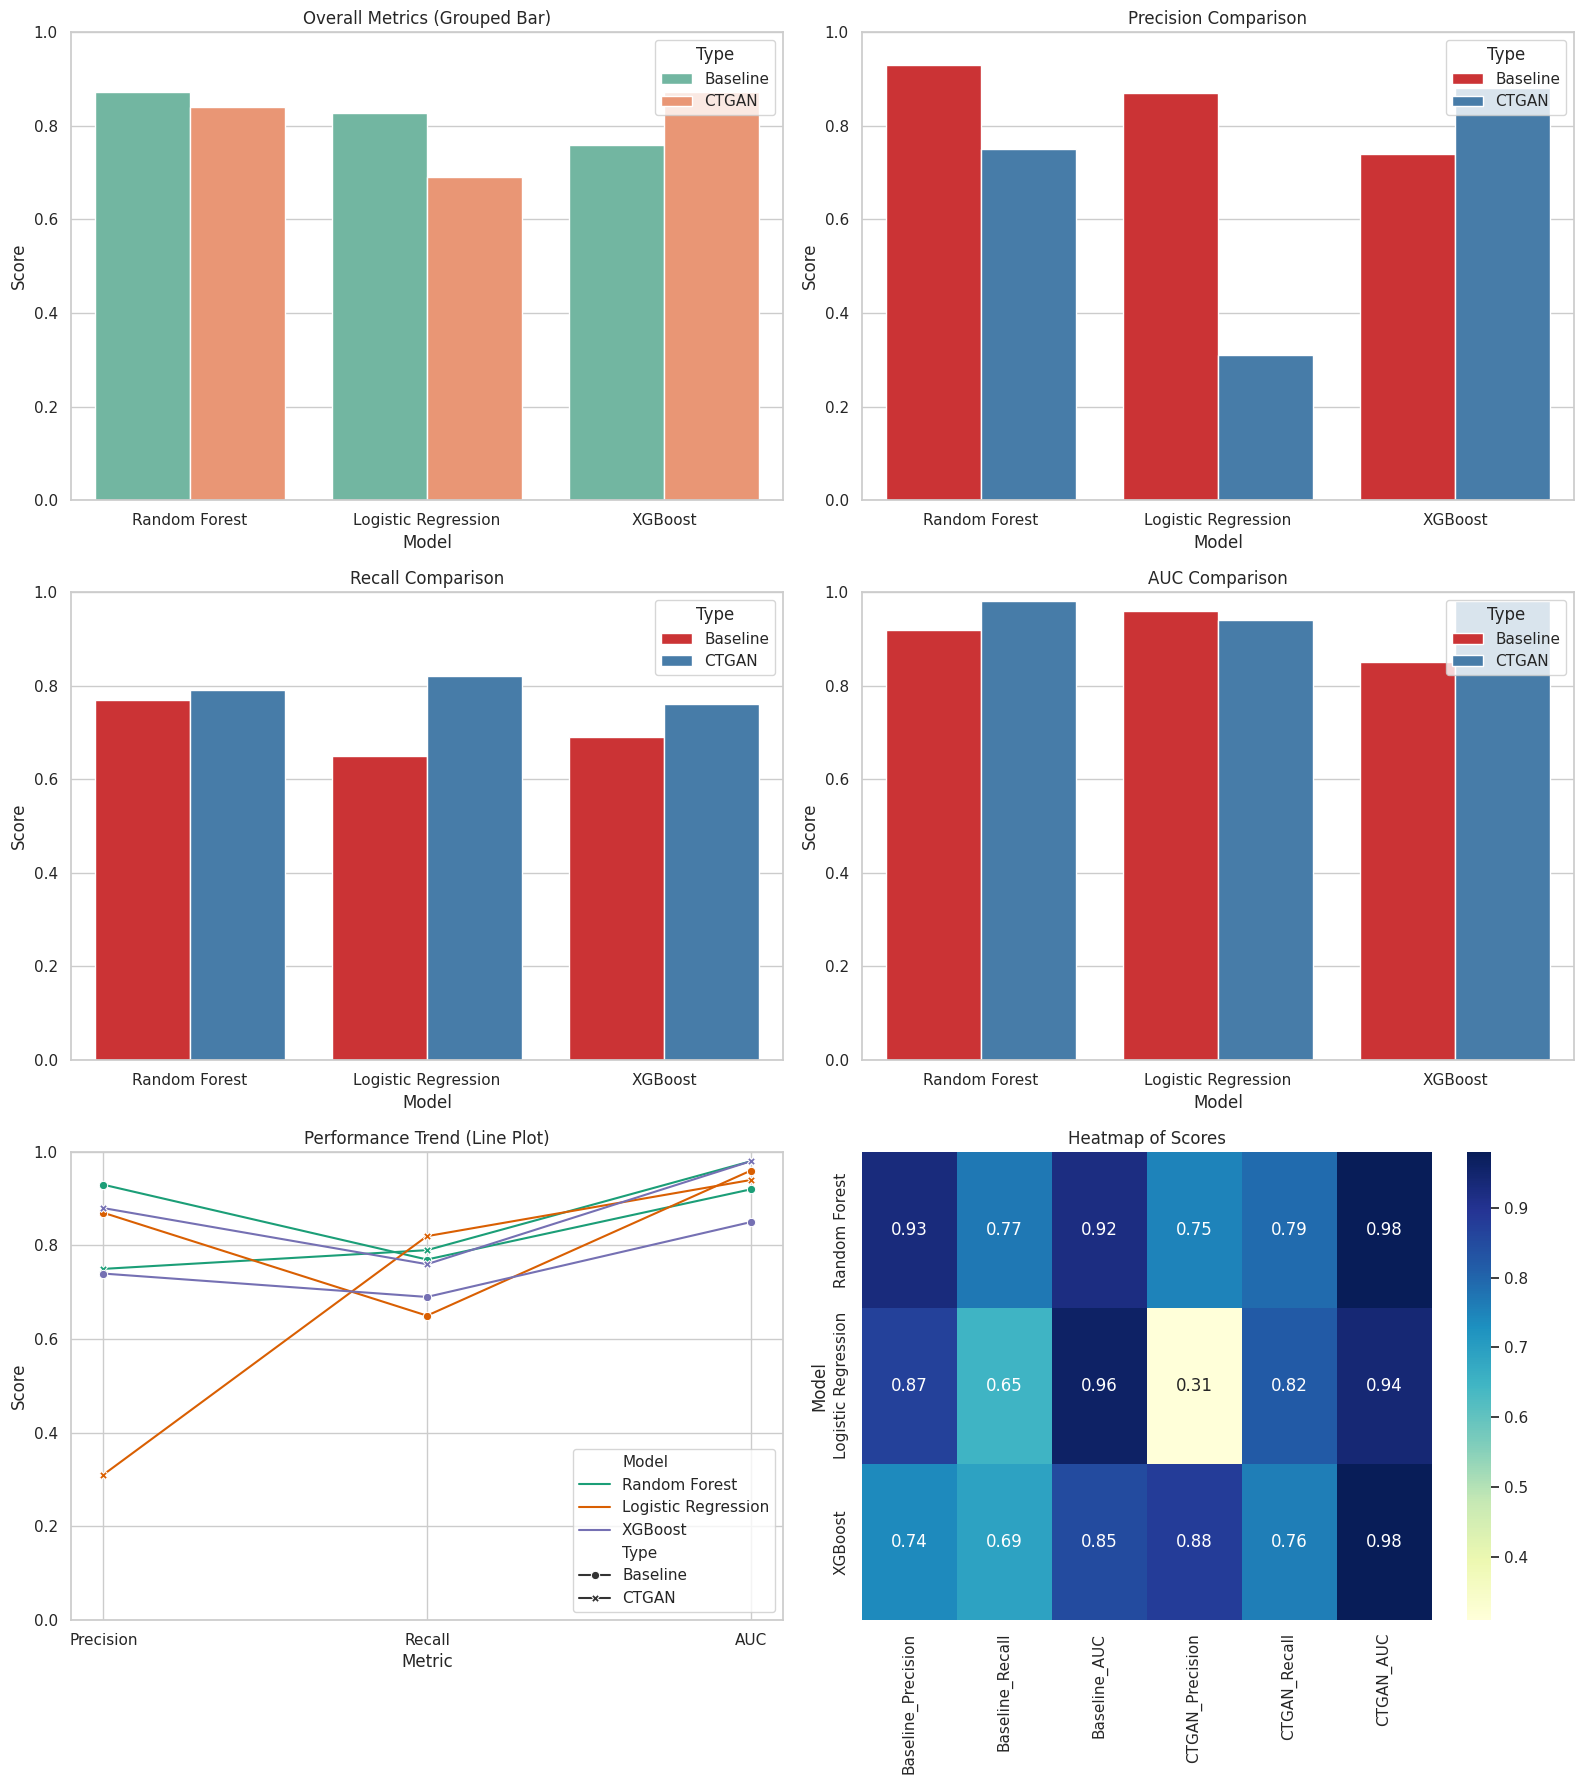

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Prepare data
results = {
    "Model": ["Random Forest", "Logistic Regression", "XGBoost"],
    "Baseline_Precision": [0.93, 0.87, 0.74],
    "Baseline_Recall": [0.77, 0.65, 0.69],
    "Baseline_AUC": [0.92, 0.96, 0.85],
    "CTGAN_Precision": [0.75, 0.31, 0.88],
    "CTGAN_Recall": [0.79, 0.82, 0.76],
    "CTGAN_AUC": [0.98, 0.94, 0.98]
}
df = pd.DataFrame(results)

# Melt for seaborn
df_melted = df.melt(id_vars="Model", var_name="Metric", value_name="Score")
df_melted["Type"] = df_melted["Metric"].apply(lambda x: "Baseline" if "Baseline" in x else "CTGAN")
df_melted["Metric"] = df_melted["Metric"].str.replace("Baseline_", "").str.replace("CTGAN_", "")

# Style
sns.set(style="whitegrid", font_scale=1.0)

# Create dashboard with subplots (3x2 grid)
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
axes = axes.flatten()

# 1) Grouped bar chart
sns.barplot(data=df_melted, x="Model", y="Score", hue="Type", ci=None, palette="Set2", ax=axes[0])
axes[0].set_title("Overall Metrics (Grouped Bar)")
axes[0].set_ylim(0, 1)

# 2) Precision bar
sns.barplot(data=df_melted[df_melted["Metric"]=="Precision"],
            x="Model", y="Score", hue="Type", ci=None, palette="Set1", ax=axes[1])
axes[1].set_title("Precision Comparison")
axes[1].set_ylim(0, 1)

# 3) Recall bar
sns.barplot(data=df_melted[df_melted["Metric"]=="Recall"],
            x="Model", y="Score", hue="Type", ci=None, palette="Set1", ax=axes[2])
axes[2].set_title("Recall Comparison")
axes[2].set_ylim(0, 1)

# 4) AUC bar
sns.barplot(data=df_melted[df_melted["Metric"]=="AUC"],
            x="Model", y="Score", hue="Type", ci=None, palette="Set1", ax=axes[3])
axes[3].set_title("AUC Comparison")
axes[3].set_ylim(0, 1)

# 5) Line plot
sns.lineplot(data=df_melted, x="Metric", y="Score", hue="Model", style="Type",
             markers=True, dashes=False, palette="Dark2", ax=axes[4])
axes[4].set_title("Performance Trend (Line Plot)")
axes[4].set_ylim(0, 1)

# 6) Heatmap
df_heatmap = df.set_index("Model")
sns.heatmap(df_heatmap, annot=True, cmap="YlGnBu", fmt=".2f", ax=axes[5])
axes[5].set_title("Heatmap of Scores")

# Adjust layout
plt.tight_layout()

# Save dashboard as PNG
plt.savefig("ctgan_dashboard.png", dpi=300)
plt.show()


In [18]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
import joblib

# ---------------------------
# 1) Train on CTGAN balanced data
# ---------------------------

# (Assuming you already have these from your CTGAN pipeline)
# X_train_bal, y_train_bal → balanced training data
# X_val, y_val → validation set
# X_test, y_test → test set

best_model = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

best_model.fit(X_train_bal, y_train_bal)

# ---------------------------
# 2) Evaluate once (to confirm)
# ---------------------------
y_pred = best_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))

# ---------------------------
# 3) Save the trained model
# ---------------------------
joblib.dump(best_model, "xgb_ctgan_model.pkl")
print("✅ Model saved as xgb_ctgan_model.pkl")

# ---------------------------
# 4) Load model & Predict single transaction
# ---------------------------
# Load later if needed
model = joblib.load("xgb_ctgan_model.pkl")

def predict_transaction(transaction_features):
    """
    transaction_features: list or array with shape (30,)
    Must match training features order: Time, V1...V28, Amount
    """
    transaction = np.array(transaction_features).reshape(1, -1)
    pred = model.predict(transaction)[0]
    prob = model.predict_proba(transaction)[0][1]

    if pred == 1:
        print(f"🚨 Fraudulent transaction detected! (probability={prob:.2f})")
    else:
        print(f"✅ Legitimate transaction (probability={prob:.2f})")

# ---------------------------
# 5) Example usage
# ---------------------------
sample_input = [
    0.0, -1.359807, -0.072781, 2.536346, 1.378155,
    -0.338321, 0.462388, 0.239599, 0.098698, 0.363787,
    0.090794, -0.551600, -0.617801, -0.991390, -0.311169,
    1.468177, -0.470401, 0.207971, 0.025791, 0.403993,
    0.251412, -0.018307, 0.277838, -0.110474, 0.066928,
    0.128539, -0.189115, 0.133558, -0.021053, 149.62
]

predict_transaction(sample_input)


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:24:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     42488
           1       0.85      0.77      0.81        71

    accuracy                           1.00     42559
   macro avg       0.92      0.89      0.90     42559
weighted avg       1.00      1.00      1.00     42559

ROC AUC: 0.8872062633757732
✅ Model saved as xgb_ctgan_model.pkl
✅ Legitimate transaction (probability=0.00)


In [19]:
import pickle
import numpy as np
import pandas as pd

# 1) Load the trained model
with open("xgb_ctgan_model.pkl", "rb") as f:
    bst = pickle.load(f)

# 2) Pick one fraud sample from your test set
fraud_sample = X_test[y_test == 1].iloc[0]   # first fraud transaction
print("Fraud sample:\n", fraud_sample)

# 3) Reshape for prediction
fraud_input = np.array(fraud_sample).reshape(1, -1)

# 4) Predict probability
prob = bst.predict_proba(fraud_input)[0][1]   # probability of fraud
pred = (prob > 0.5).astype(int)

# 5) Print result
if pred == 1:
    print(f"🚨 Fraudulent transaction detected! (probability={prob:.2f})")
else:
    print(f"✅ Legitimate transaction (probability={prob:.2f})")


Fraud sample:
 Time       0.818120
V1        -0.082983
V2        -3.935919
V3        -2.616709
V4         0.163310
V5        -1.400952
V6        -0.809419
V7         1.501580
V8        -0.471000
V9         1.519743
V10       -1.134454
V11        0.713878
V12        0.979675
V13       -1.339031
V14        0.984993
V15       -0.382471
V16       -0.934616
V17       -0.052419
V18        0.511162
V19        0.731999
V20        1.878612
V21        0.702672
V22       -0.182305
V23       -0.921017
V24        0.111635
V25       -0.071622
V26       -1.125881
V27       -0.170947
V28        0.126221
Amount    14.949103
Name: 249239, dtype: float64
✅ Legitimate transaction (probability=0.00)


In [21]:
import pandas as pd
import pickle
import numpy as np

# ---------------------------
# 1) Load your balanced dataset (used for training)
# ---------------------------
# Assuming you already have df_train_bal with "Class" column
# If not, load it from CSV or recreate using your earlier pipeline

print("Dataset shape:", df_train_bal.shape)
print(df_train_bal['Class'].value_counts())

# ---------------------------
# 2) Pick one fraud transaction
# ---------------------------
fraud_example = df_train_bal[df_train_bal['Class'] == 1].iloc[0].drop("Class")
fraud_input = fraud_example.values.reshape(1, -1)

print("\nFraud sample shape:", fraud_input.shape)
print("Feature count:", len(fraud_example))

# ---------------------------
# 3) Load trained XGBoost model
# ---------------------------
with open("xgb_ctgan_model.pkl", "rb") as f:
    bst = pickle.load(f)

# ---------------------------
# 4) Predict for one fraud sample
# ---------------------------
prob = bst.predict_proba(fraud_input)[0][1]
pred = (prob > 0.5).astype(int)

print("\n=== Single Fraud Transaction Test ===")
if pred == 1:
    print(f"🚨 Fraudulent transaction detected! (probability={prob:.4f})")
else:
    print(f"✅ Legitimate transaction (probability={prob:.4f})")

# ---------------------------
# 5) BONUS: Test multiple samples (fraud & legit)
# ---------------------------
print("\n=== Multiple Sample Test ===")

# Pick 5 fraud & 5 legit transactions
fraud_samples = df_train_bal[df_train_bal['Class'] == 1].sample(5, random_state=42)
legit_samples = df_train_bal[df_train_bal['Class'] == 0].sample(5, random_state=42)

# Combine
test_samples = pd.concat([fraud_samples, legit_samples])
X_test_samples = test_samples.drop("Class", axis=1)
y_test_samples = test_samples["Class"]

# Predict
probs = bst.predict_proba(X_test_samples)[:,1]
preds = (probs > 0.5).astype(int)

# Show results
results = pd.DataFrame({
    "True_Label": y_test_samples.values,
    "Predicted": preds,
    "Fraud_Probability": probs.round(4)
})
print(results)


Dataset shape: (326042, 31)
Class
0    198277
1    127765
Name: count, dtype: int64

Fraud sample shape: (1, 30)
Feature count: 30

=== Single Fraud Transaction Test ===
🚨 Fraudulent transaction detected! (probability=1.0000)

=== Multiple Sample Test ===
   True_Label  Predicted  Fraud_Probability
0           1          1             1.0000
1           1          1             1.0000
2           1          1             1.0000
3           1          1             1.0000
4           1          1             1.0000
5           0          0             0.0064
6           0          0             0.0027
7           0          0             0.0003
8           0          0             0.0005
9           0          0             0.0002
